# Are England historically Root(ed) without Joe?

### A historical comparison of the dependence of the current England Cricket Team on Joe Root scoring runs

#### J Jorgensen 
#### Rev A - 08 September 2021

At present (September 2021) Joe Root is in the form of his life. The remainder of the England batting line-up, however, is not. The conjecture is that this England Test side is more dependent on Joe Root scoring big runs than nearly any other side in modern cricketing history. A suggested comparison is the reliance of the late 1990's / early 2000's West Indies side on Brian Lara. But is this conjecture borne out in the data? This notebook analyses year-by-year Test batting statistics (appreciating this may not be the most appropriate temporal window available) to determine whether England really are Root(ed) without Joe.

##### Note: Current results exclude Bangladesh, Ireland & Afghanistan. These teams will be added in coming revisions

# Assumptions & Input Data

### Governing Assumptions

* The assumptions detailed are relevant across:-
    * All time periods - no temporal variation is acocunted for
    * All teams - no particular adjustment is made for changes in team situation (i.e. new Test playing nations like Afghanistan are treated the same as England and Australia)
    * All locations - no delineation is made between home and away matches
    * All players - no delineation is made between those players deemed batters, and those not
* This analysis considers only Men's Test Cricket currently. A similar statistical analysis for Women's Test Cricket is in the works
* No adjustment is made for years where teams only played a small number of matches


### Input data
* Input data (drawn from CricInfor StatsGuru platform) is assumed to be correct in full, and complete to the latest matches
* Total runs scored by each Test playing nation is extracted on a year-by-year basis
* Total runs scored by the top 50 run scorers across all test playing nations is extracted on a year-by-year basis. The top 50 has been selected as good representation of the likely top scorers for all nations, thereby capturing data necessary to analyse team reliance
* The temporal windowing on year-by-year data (i.e. assessment of calendar years) may not be the most appropriate window available. However, in the first instance, it is the most readily accesible window given data is categorised into calendar years.


# Methodology

The methodology to analyse the historical context of the England Team's current reliance on Joe Root's batting output is defined below. This question can be posed in a number of ways, such as:-

* Does Joe Root score a historically high proportion of England's test runs for the current team?
* What is the probability of England posting a large innings score, given Joe Root makes above 50? And how does this compare to historical probabilities for other player / team combinations?
* What is the probability of England posting a large innings score, given Joe Roo makes below 50? And how does this compare to historical probabilities for other player / team combinations?
* What is the average England innings total, given a score by Joe Root within defined intervals (i.e. 0-10, 10-20, 20-30 etc.)?And how does this compare to historical averages for other player / team combinations?

All questions posed above will tell us something above England's reliance on Root. However, they will also all provide subtly different information. For example, assessment of innings data will remove skew due to very-large scores. As noted when defining input data, a year-by-year cumulative approach is adopted, which neglects analyses on a inidivudal innings-by-innings basis. It is assumed that year-by-year statistics are a good approximation of match-by-match performance, however this bears further scrutiny in future analyses. Given the year-by-year approach, this analysis will initially focus on the proportion of runs scored in Tests by Joe Root (and others), relative to their team scores. 

Therefore, reliance here is defined as the proportion of player to team runs. The higher this proportion, the higher the team relies on said player. A naive assumptions may be that this proportion should be equal to 1/11 = 9.09 %. This of course does not account for the skills disparity between batters and non-batters, and therefore a more reasonable assumption (where we define numbers 1-7 as batters) may be ~12.1 %. This number derives from an assumption the top 7 will score 85 % of the teams runs, spread evenly across all players. Of course, we may refine this assumption further. However, for the purposes of this analysise, let us assume that a reasonably expected baseline for player/team reliance is ~12.1 %. Any figure higher than this would indicate a batter on whom the team may rely more than your average batter. To the extreme, we may consider "A Bannerman" as the limit of this reliance percentage. That is, the 67.35 % of Australian first innings runs that Charles Bannerman scored with his 165 runs out of 245 total in the first ever test match (also the first ever Test innings, defined many years post). If we consider player / team reliance for batters to lie somewhere on the range 12.1 % - 67.35 % we have a reasonable (albeit vague) guide of what to expect.

When we consider year-by-year cumulative figures we also tend to smooth out anomalies. For example, Kyle Mayers may have had a high reliance ranking after his double century in his first test match against Bangladesh in 2021. This has surely reduced in subsquent outings. The calendar year delineation is an arbitrary temporal window, but one that is regularly used in cricketing statistical analysis. We will stick with this windowing. 

The result of this analysis is a ranking of reliance across Men's Test match history. This means players may well appear in the ranking multiple times for multiple years. Back to our original question, we will use this ranking to determine if the current England Team does indeed rely in historically unprecedented manner on Joe Root. 

# Analysis

In [ ]:
# Root_analysis.py
# ###############################################
# Author: J Jorgensen
# Date: 06/09/2021
# Function: batsman4s
# This function analyses the historical batting player / team reliance for test cricket 
#################################################

In [7]:
# Import required modules
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import os.path


True

In [34]:
# Set-up parameters for data ingest from CricInfo Statsguru
# Initialize url to ""
url = ""
suburl1 = "http://stats.espncricinfo.com/ci/engine/stats/index.html"

# Match type - set to tests
match_type = "?class=1;"

# Test teams
teams = ["Afghanistan", "Australia", "Bangladesh", "England", "ICC World XI", "India",
        "Ireland", "New Zealand", "Pakistan", "South Africa", "Sri Lanka", "West Indies",
        "Zimbabwe"]

# Setting calendar year span
spanmax = "spanmax1=31+Dec+"
spanmin = ";spanmin1=01+Jan+"
spanval = ";spanval1=span;"

# Setting results type to template, and stats type to batting
template = ";template=results;"
player_batting = "type=batting"
team_batting = "type=team;"
match = "view=match"

# Set year runs
years = np.arange(1877, 2022,1)
years = np.char.mod('%d', years)


In [33]:
# Ingest data from CricInfo Statsguru & Calculate calendar year reliance - skip if data already exists

if os.path.isfile("reliance.txt"):
    #print("The data exists - importing now")
    reliance = np.loadtxt("reliance.txt") # Load reliance data
    players = pd.read_csv("players.txt", sep=r' b', header=None) # Load players
    
elif os.path.isfile("reliance.txt") == False:

    # Set-up reliance database

    reliance = np.zeros((len(years), len(teams)))
    players = np.empty([len(years), len(teams)], dtype="S30")


    for j in range(0,9):#len(teams)):

        for i in range(0,len(years)):

            # Set-up urls
            url_players = suburl1 + match_type + spanmax + years[i] + spanmin + years[i] + spanval + "team=" + str(j+1) + template + player_batting
            url_team = suburl1 + match_type + spanmax + years[i] + spanmin + years[i] + spanval + "team=" + str(j+1) + template + team_batting + match

            # Read data from url
            dfList_players = pd.read_html(url_players)
            dfList_team = pd.read_html(url_team)

            # Calculate maximum reliance for that team for that year, and harvest player name
            if dfList_team[2].iloc[0,0] == "No records available to match this query":
                reliance[i,j] = 0
                players[i,j] = ''
            else:
                df_players = dfList_players[2]
                df_team  = dfList_team[2]

                # Calculate maximum reliance for that team for that year, and harvest player name
                reliance[i,j] = int(df_players["Runs"][0]) / sum(df_team["Runs"])
                players[i,j] = df_players["Player"][0]

    # Save data to source folder 
    np.savetxt("reliance.txt", reliance)
    np.savetxt("players.txt", players, delimiter=" ", newline = "\n", fmt="%s")

The data exists - importing now


<ipython-input-33-89154f4c54e4>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  players = pd.read_csv("players.txt", sep=r' b', header=None) # Load players


In [81]:
# Create dataframe from data
df = pd.DataFrame({"Year":years})

teams_new = ["England", "Australia", "South Africa", "West Indies", "New Zealand", 
             "India", "Pakistan", "Sri Lanka", "Zimbabwe"]

for j in range(0,9):
    df[teams_new[j] + " Player"] = players.iloc[:,j]
    df[teams_new[j] + " Reliance"] = reliance[:,j]
    
    if j == 0:
        df[teams_new[j] + " Player"] = df[teams_new[j] + " Player"].str.strip("b'")
        
    else: 
        df[teams_new[j] + " Player"] = df[teams_new[j] + " Player"].str.strip("'")

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(np.int64)
#df

,Year,England Player,England Reliance,Australia Player,Australia Reliance,South Africa Player,South Africa Reliance,West Indies Player,West Indies Reliance,New Zealand Player,New Zealand Reliance,India Player,India Reliance,Pakistan Player,Pakistan Reliance,Sri Lanka Player,Sri Lanka Reliance,Zimbabwe Player,Zimbabwe Reliance
0,1877,G Ulyett,0.216885,C Bannerman,0.286301,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000
1,1878,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000
2,1879,Lord Harris,0.252747,AC Bannerman,0.265455,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000
3,1880,WG Grace,0.337526,WL Murdoch,0.321429,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000
4,1881,J Selby,0.207641,TP Horan,0.335570,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000,,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2017,JE Root,0.162846,SPD Smith,0.215275,D Elgar,0.186508,SD Hope,0.163149,KS Williamson,0.154056,CA Pujara,0.177377,Azhar Ali,0.164062,FDM Karunaratne,0.152245,Sikandar Raza,0.184289
141,2018,JE Root,0.138779,UT Khawaja,0.152786,AK Markram,0.139217,SO Dowrich,0.124934,TWM Latham,0.176266,V Kohli,0.195043,Babar Azam,0.145180,BKG Mendis,0.169934,BRM Taylor,0.248234
142,2019,JE Root,0.148543,M Labuschagne,0.168113,Q de Kock,0.186649,JO Holder,0.143813,LRPL Taylor,0.149213,MA Agarwal,0.163593,Babar Azam,0.202432,FDM Karunaratne,0.165463,,0.000000
143,2020,BA Stokes,0.136209,M Labuschagne,0.298519,D Elgar,0.158897,J Blackwood,0.197502,KS Williamson,0.184035,AM Rahane,0.194564,Babar Azam,0.157502,AD Mathews,0.172909,CR Ervine,0.163303


### Plot Results year-by-year for all test playing nations

Looking at reliance across the history of test cricket a few points stand out:-

* A rough expectation of average reliance on top players is around 20 %. This is relatively consistent (with some outliers) from 1877 - present
* More outliers exist for earlier test cricket (say pre-1950). This may be expected, with fewer games played.
* A couple of major outliers exist, both in the early and modern eras, with reliance aroun 40 %. These will be examined further in following sections.

(5.0, 45.0)

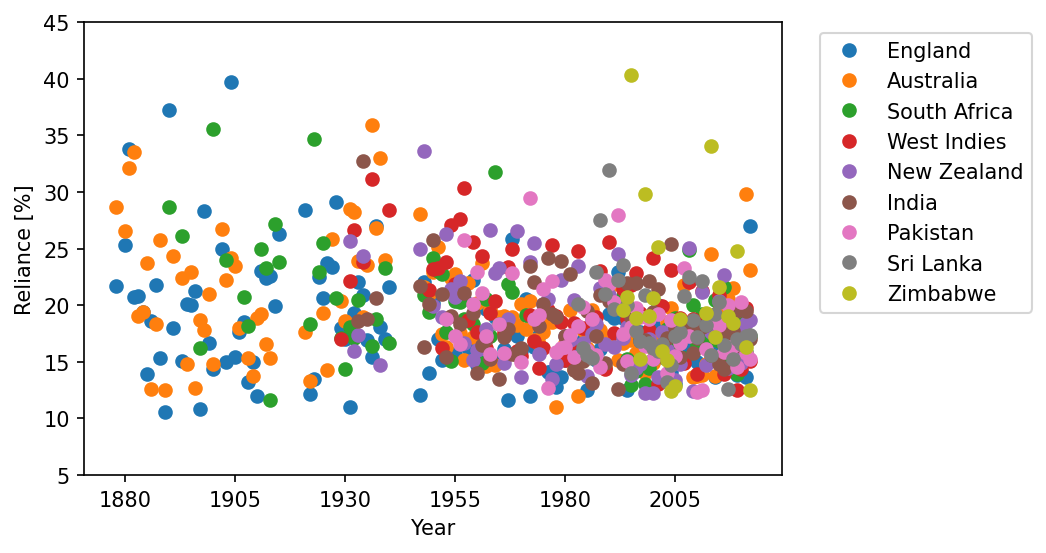

In [64]:
# Plot results for all nations
plt.rcParams['figure.dpi'] = 150

for j in range(0,9):
    plt.plot(df[teams_new[j] + " Reliance"]*100, 'o')
    
    
plt.ylabel("Reliance [%]")
plt.xlabel("Year")
plt.legend(labels = teams_new, bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(ticks = np.arange(2,145, 25), labels=np.arange(1880,2022, 25))
plt.ylim((5,45))

### Plot peak reliance for all teams  - identifying year and player

If we now consider the peak reliance for all teams across history the following is observed from the data:-

* Historically, England have never been more reliant on a player in any calendar year than they were on Tip Foster in 1903
* The historical marker for Australia is Stan McCabe in 1935 - the year of the Australian tour to South Africa that Don Bramdan mised due to illness!
* Dave Houghton of Zimbabwe holds the historical record for reliance of 40.3 % in the 1994 calendar year
* For those teams with a pre-1950s history of Test cricket, all have peak reliance in this era

(20.0, 45.0)

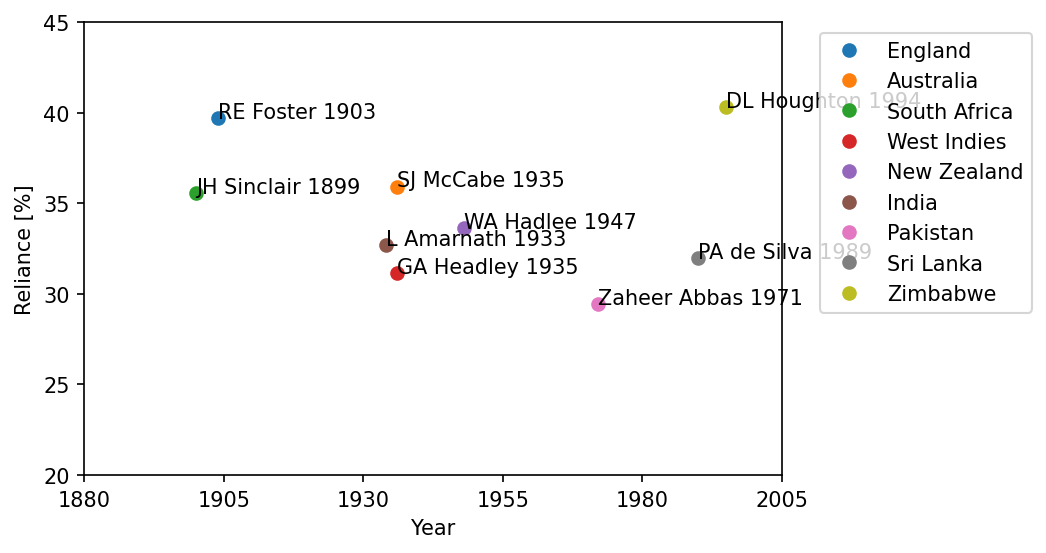

In [120]:
# Plot top reliance from each test playing nation

plt.rcParams['figure.dpi'] = 150

for j in range(0,9):
    plt.plot(df[teams_new[j] + " Reliance"].idxmax(), df[teams_new[j] + " Reliance"].max()*100, 'o')
    plt.annotate(df[teams_new[j] + " Player"][df[teams_new[j] + " Reliance"].idxmax()] + " " + str(df["Year"][df[teams_new[j] + " Reliance"].idxmax()]), (df[teams_new[j] + " Reliance"].idxmax(), df[teams_new[j] + " Reliance"].max()*100))
    
plt.ylabel("Reliance [%]")
plt.xlabel("Year")
plt.legend(labels = teams_new, bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(ticks = np.arange(2,145, 25), labels=np.arange(1880,2022, 25))
plt.ylim((20,45))


### Plot data from 1990-present to provide context for Joe Root's current year

We now consider the era from 1990 to the present day (2021) to provide a more modern context for Joe Root's form. We observe a number of interesting points from the data:-

* Neglecting outliers, average reliance for all teams sits on the range 15 - 20 %. 
* Zimbabwe relies quite consistently on individual players.

(5.0, 45.0)

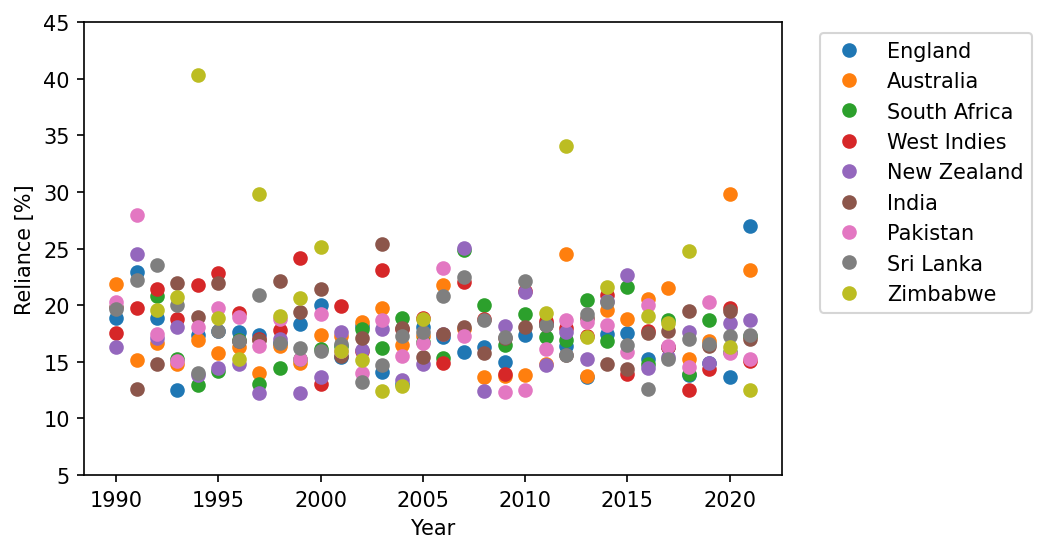

In [88]:
# Plot 1990-present
plt.rcParams['figure.dpi'] = 150
ind = df.index[df['Year'] >= 1990]

for j in range(0,9):
    plt.plot(df[teams_new[j] + " Reliance"][ind]*100, 'o')
    
    
plt.ylabel("Reliance [%]")
plt.xlabel("Year")
plt.legend(labels = teams_new, bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(ticks = np.arange(ind.min(),145, 5), labels=np.arange(df['Year'][ind.min()],2022, 5))
plt.ylim((5,45))

###  Plot peak reliance from 1990-present for all teams

We consider peak reliance for each team from 1990 to present day. We observe a number of interesting points from the data:-

* Joe Root's 2021 is the peak reliance for England in the last 31 years of test cricket.
* However, it is not as prominent as Marnus Labuschagne's 2020 for Australia.
* The perception that the West Indies team of the late 1990s and early 2000s relied dispropotionately on Brian Lara is belied in the data. 

(20.0, 45.0)

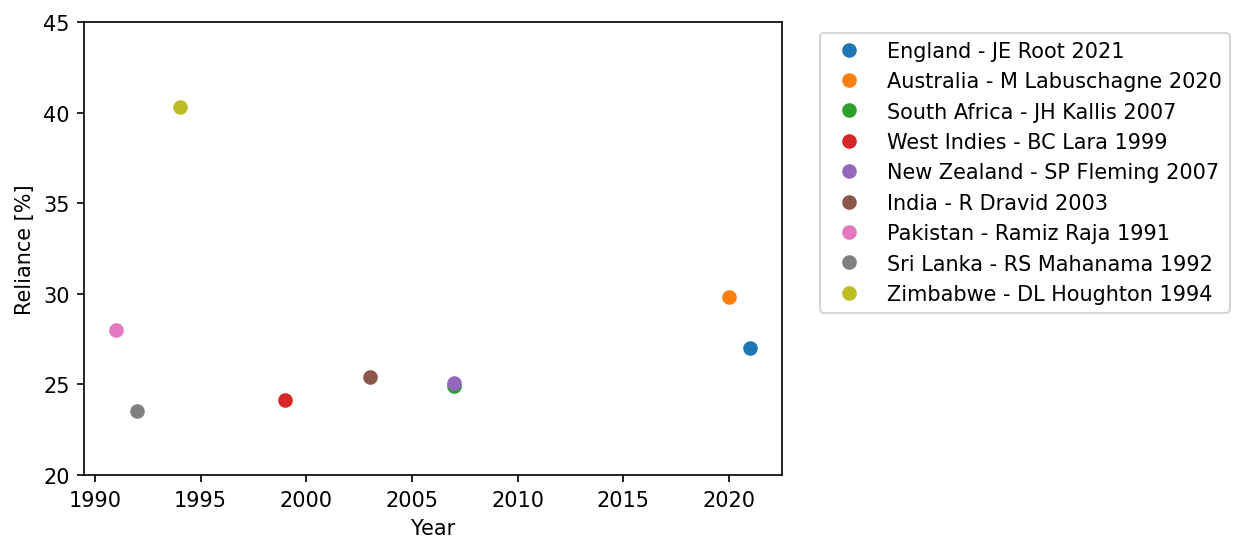

In [117]:
# Plot 1990-present
plt.rcParams['figure.dpi'] = 150
ind = df.index[df['Year'] >= 1990]

labs = np.empty([9, 1], dtype="S30")

for j in range(0,9):
    plt.plot(df[teams_new[j] + " Reliance"][ind].idxmax(), df[teams_new[j] + " Reliance"][ind].max()*100, 'o')
    #plt.plot(df[teams_new[j] + " Reliance"].idxmax(), df[teams_new[j] + " Reliance"].max()*100, 'o')
    #plt.annotate(df[teams_new[j] + " Player"][df[teams_new[j] + " Reliance"][ind].idxmax()] + " " + str(df["Year"][df[teams_new[j] + " Reliance"][ind].idxmax()]), (df[teams_new[j] + " Reliance"][ind].idxmax(), df[teams_new[j] + " Reliance"][ind].max()*100))
    labs[j] = str(teams_new[j] + ' - ' + df[teams_new[j] + " Player"][df[teams_new[j] + " Reliance"][ind].idxmax()] + " " + str(df["Year"][df[teams_new[j] + " Reliance"][ind].idxmax()]))

labs = np.char.decode(labs)

plt.ylabel("Reliance [%]")
plt.xlabel("Year")
plt.legend(labels = np.resize(labs, [9,]), bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(ticks = np.arange(ind.min(),145, 5), labels=np.arange(df['Year'][ind.min()],2022, 5))
plt.ylim((20,45))